In [1]:
using Distributions
using LinearAlgebra
using CSV
using Plots
include("./src/autoPic.jl")

autoClose (generic function with 4 methods)

In [2]:
treeFileName = "./mu_comb.csv"
projFileName = "./data_proj_414.csv"

"./data_proj_414.csv"

In [3]:
trees_x = Array{Float64,1}()
trees_y = Array{Float64,1}()
grid_observed = zeros(Int8, 107, 107)
csvFile = CSV.read(projFileName)
treeFile = CSV.File(treeFileName)
num_observed_grid = 0

0

In [4]:
farFile = CSV.read("far_map2.csv");
closeFile = CSV.read("close_map2.csv");

In [5]:
dndx = []
dndy = []
dndn = []
dnpx = []
dnpy = []
dnpn = []
for i = 1:107
    for j = 1:107
        if farFile[i,j] != -1
            push!(dndx, i)
            push!(dndy, j)
            push!(dndn, farFile[i,j])
        end
        if closeFile[i,j] != -1
            push!(dnpx, i)
            push!(dnpy, j)
            push!(dnpn, closeFile[i,j])
        end
    end
end         

In [6]:
# length(closeFile)

In [7]:
using DataFrames, CSV
function save_array(file_name, map_close)
    df_close = DataFrame(map_close)
    CSV.write(file_name, df_close, delim="\t")
end
    

save_array (generic function with 1 method)

In [8]:
dnd = DataFrame(X = dndx, Y = dndy, N = dndn);
dnp = DataFrame(X = dnpx, Y = dnpy, N = dnpn);

In [9]:
print(size(dnd),", ",size(dnp))

(4146, 3), (3252, 3)

In [10]:
save_array("./far_map_linear.csv", dnd)
save_array("./close_map_linear.csv", dnd)

"./close_map_linear.csv"

In [11]:
# dnp.N[1631]

In [12]:
dnp_N_max = findmax(dnp.N)[1]

402

In [13]:
size_x = 5
pic = scatter(dnd.X,dnd.Y, size=(107*size_x,100*size_x),markerstrokewidth = 0, leg=false, xlims = (0,107), xticks = 0:10:107,
            ylims = (0,107), yticks = 0:10:107, color = :azure3)

pic = scatter!(dnp.X,dnp.Y, size=(107*size_x,100*size_x),markerstrokewidth = 0, leg=false, xlims = (0,107), xticks = 0:10:107,
            ylims = (0,107), yticks = 0:10:107,zcolor=(dnp.N/dnp_N_max), m=(:heat, 0.9) )

savefig("pic/fig7.png")
# savefig("pic/fig7.svg")

In [14]:
function fix_pos(nx)
    if nx < 0 
        nx = -nx
    end
    return ceil(Int64, nx)
end

fix_pos (generic function with 1 method)

In [15]:
num_observed_grid = size(dnd,1)

4146

In [16]:
treesFile = CSV.read(treeFileName)
# treesFile = treeFile

num_observed_trees = size(treesFile,1)
trees_x = Array{Float64,1}()
trees_y = Array{Float64,1}()
for i in 1:num_observed_trees
    push!(trees_x, treesFile.X[i])
    push!(trees_y, treesFile.Y[i])
end

In [17]:
lambda_hat = num_observed_trees / num_observed_grid

grid_distribution = Poisson(lambda_hat)
print(lambda_hat,", ", num_observed_trees ,", ", num_observed_grid,", ", lambda_hat*107^2)

0.005065123010130246, 21, 4146, 57.990593342981185

In [18]:
function Uniform(a,b)
    kk = rand()
    len = abs(b-a)
    return kk*len-a
end

org_x = deepcopy(trees_x)
org_y = deepcopy(trees_y)
jiulings_accumulate = 0
rounds = 100
for round = 1:rounds
    jiuling = 0
    for x = 1:107
        for y = 1:107
            if farFile[x, y] == 0
                continue
            end
            if farFile[x, y] == -1
                v = Uniform(0,1)
                jiuling_num = 0
                while v >= cdf(grid_distribution, jiuling_num) 
                    jiuling_num += 1
                end
                if round == rounds
                    for k = 1:jiuling_num
                        x_in, y_in = x-Uniform(0,1), y-Uniform(0,1)
                        push!(org_x, fix_pos(x_in))
                        push!(org_y, fix_pos(y_in))
                    end
                end
                jiuling += jiuling_num
            end
        end
    end
    jiulings_accumulate += jiuling
end

println("Jiuling (unobserved)\t", round(Int, jiulings_accumulate/rounds))
println("Jiuling (observed)\t", num_observed_trees)
println("Jiuling (Total)  \t", round(Int, jiulings_accumulate/rounds)+num_observed_trees)
println("Jiuling (this time)\t", length(org_x))
println("Jiuling (area on)\t", Int(floor(lambda_hat*107^2)))

Jiuling (unobserved)	37
Jiuling (observed)	21
Jiuling (Total)  	58
Jiuling (this time)	58
Jiuling (area on)	57


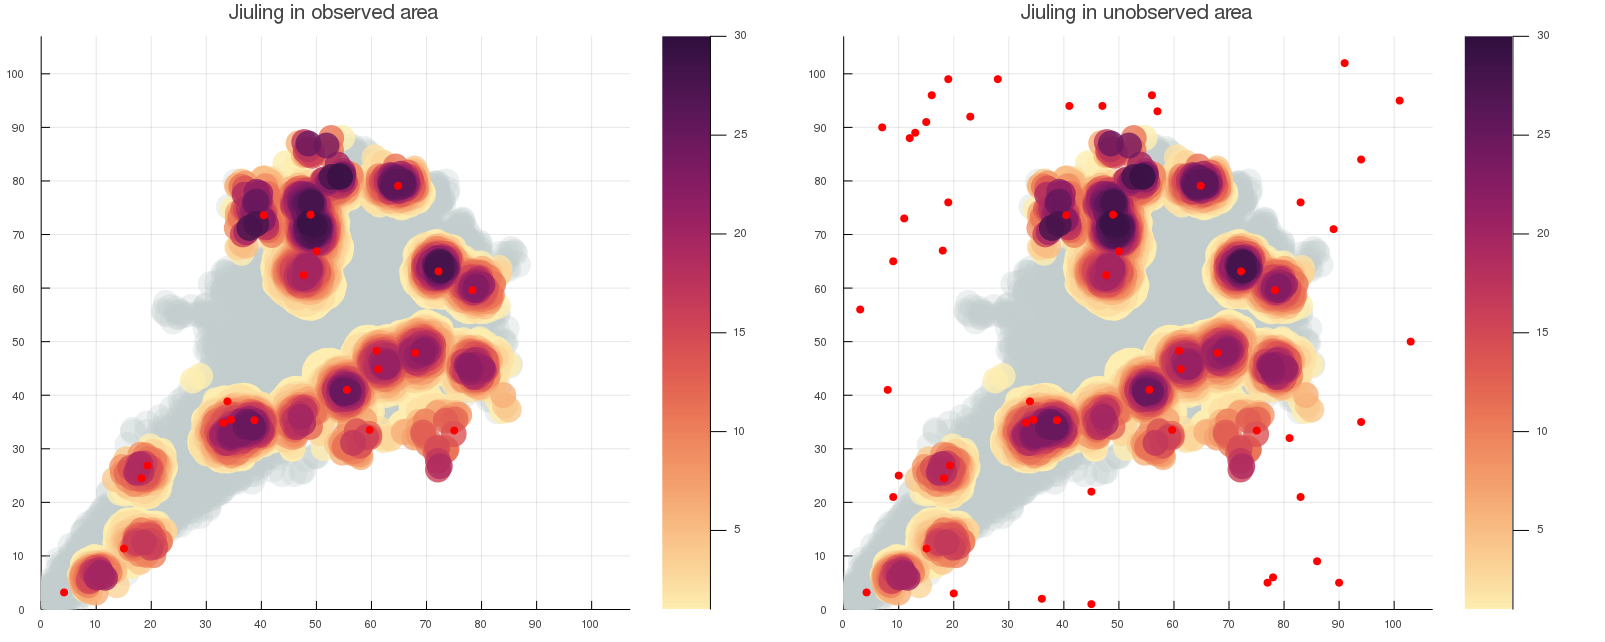

In [19]:
pw_far = autoFar("./data_proj_414.csv","Jiuling in observed area")
size_x = 5
pw_far = scatter!(trees_x, trees_y, markersize = 1*size_x, markerstrokewidth = 0,
            markercolor = :red, size=(107*size_x,107*size_x), leg=false, xlims = (0,107), xticks = 0:10:107,
            ylims = (0,107), yticks = 0:10:107)

pw_far2 = autoFar("./data_proj_414.csv","Jiuling in unobserved area")
size_x = 5
pw_far2 = scatter!(org_x, org_y, markersize = 1*size_x, markerstrokewidth = 0,
            markercolor = :red, size=(107*size_x,107*size_x), leg=false, xlims = (0,107), xticks = 0:10:107,
            ylims = (0,107), yticks = 0:10:107)

plot(pw_far, pw_far2,layout=(1,2), size=(107*15,107*6), fmt = :png)

In [20]:
savefig("pic/fig6.png")
# savefig("pic/fig6.svg")